In [339]:
%matplotlib inline

import pandas as pd
names=['username', 'uploads', 'subs', 'views', 'instafollowers', 
       'instafollowing', 'instaposts', 'twitfollowers', 'tweets', 'twitlikes']
data = pd.read_csv('Dataset.csv', sep=';', header=None, names=names)
data = data[data.ne('--').all(1)]
for nm in names[1:]:
    data[nm] = data[nm].apply(lambda x: x.replace(',','') if isinstance(x, str) else x)
    data[nm] = data[nm].apply(lambda x: round(float(x)) if isinstance(x, str) else x)
    data[nm] = data[nm].apply(lambda x: int(x))
    
data['avg_views'] = data.apply(lambda row: row.views // row.uploads, axis=1)

data['size'], bins = pd.cut(data.views, 4, labels=[1, 2, 3, 4], retbins=True)

print(bins)

print(data[data['size'] == 1].shape[0]/data.shape[0])
print(data[data['size'] == 2].shape[0]/data.shape[0])
print(data[data['size'] == 3].shape[0]/data.shape[0])
print(data[data['size'] == 4].shape[0]/data.shape[0])

reorder=['username', 'views', 'avg_views', 'size', 'uploads', 'subs', 'instafollowers', 
         'instaposts', 'twitfollowers', 'tweets', 'instafollowing', 'twitlikes']
data = data[reorder]

[-3.71531201e+07  9.29238990e+09  1.85847634e+10  2.78771370e+10
  3.71695105e+10]
0.9629941126997477
0.031118587047939444
0.002523128679562658
0.00336417157275021


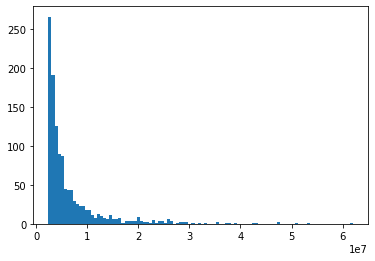

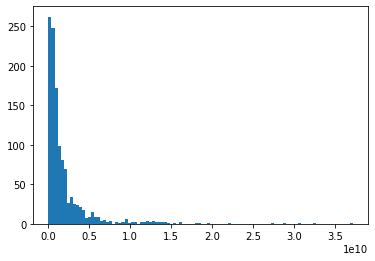

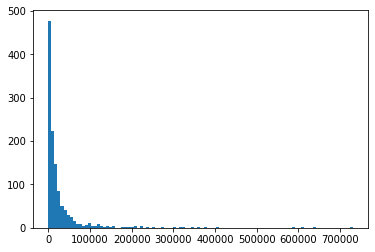

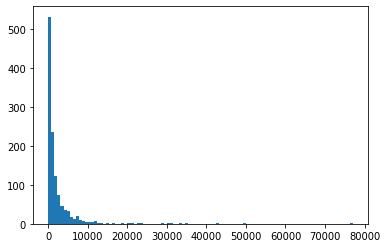

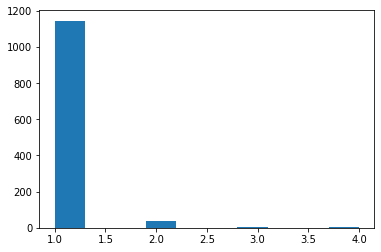

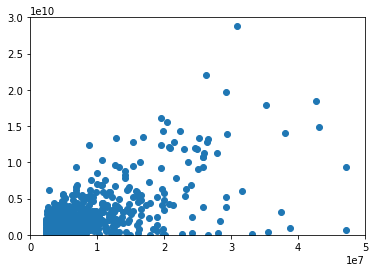

In [2]:
from matplotlib import pyplot as plt
plt.hist(data.subs, bins=100)
plt.show();
plt.hist(data.views, bins=100)
plt.show();
plt.hist(data.tweets, bins=100)
plt.show();
plt.hist(data.instaposts, bins=100)
plt.show();
plt.hist(data['size'])
plt.show();

plt.xlim(0, 50000000)
plt.ylim(0, 30000000000)
plt.scatter(data.subs, data.views)
plt.show();

1905057904.483312
[ 4.55393897e+04  3.73188243e+02  1.01986413e+05 -3.04110793e+01
 -3.75990214e+03 -6.93284709e+01]


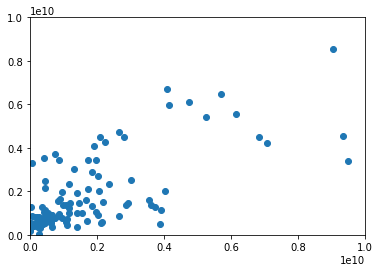

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

X = data[['uploads', 'subs', 'instaposts', 'instafollowers', 'tweets', 'twitfollowers']].values
Y = np.ravel(data[['views']])

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.1)

linreg = LinearRegression()
linreg.fit(train_X, train_Y)

linreg_pred = linreg.predict(test_X)
print(np.sqrt(metrics.mean_squared_error(test_Y, linreg_pred)))

print(linreg.coef_)

_ = plt.xlim(0, 10000000000)
_ = plt.ylim(0, 10000000000)
plt.scatter(test_Y, linreg_pred)
plt.show();

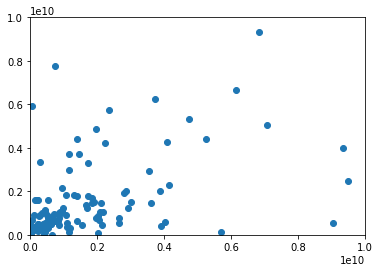

In [4]:
from sklearn import tree

dectree = tree.DecisionTreeRegressor()
dectree.fit(train_X, train_Y)

dectree_pred = dectree.predict(test_X)
np.sqrt(metrics.mean_squared_error(test_Y, dectree_pred))


plt.xlim(0, 10000000000)
plt.ylim(0, 10000000000)
plt.scatter(test_Y, dectree_pred)
plt.show()

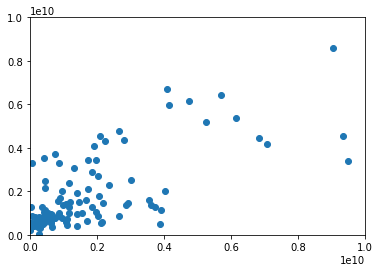

In [5]:
from sklearn.linear_model import BayesianRidge

ridgereg = BayesianRidge()
ridgereg.fit(train_X, train_Y)

ridgereg_pred = ridgereg.predict(test_X)
np.sqrt(metrics.mean_squared_error(test_Y, ridgereg_pred))

plt.xlim(0, 10000000000)
plt.ylim(0, 10000000000)
plt.scatter(test_Y, ridgereg_pred)
plt.show()

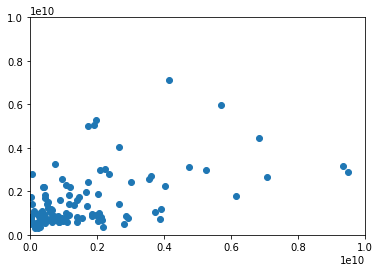

In [6]:
from sklearn.neighbors import KNeighborsRegressor

kneighbour = KNeighborsRegressor(n_neighbors=5)
kneighbour.fit(train_X, train_Y)

kneighbour_pred = kneighbour.predict(test_X)
np.sqrt(metrics.mean_squared_error(test_Y, kneighbour_pred))

plt.xlim(0, 10000000000)
plt.ylim(0, 10000000000)
plt.scatter(test_Y, kneighbour_pred)
plt.show()

In [396]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

cat_X = data[[ 'instaposts', 'instafollowers', 'tweets', 'twitfollowers']].values
cat_Y = np.ravel(data[['size']])

cat_train_X, cat_test_X, cat_train_Y, cat_test_Y = train_test_split(cat_X, cat_Y, test_size=0.2)

perc = Perceptron()
perc.fit(cat_train_X, cat_train_Y)

print(perc.score(cat_test_X, cat_test_Y))

percpred = perc.predict(cat_test_X)
print(precision_score(cat_test_Y, percpred, average=None))
print(recall_score(cat_test_Y, percpred, average=None))


print(cat_test_Y)
print(multilabel_confusion_matrix(cat_test_Y, percpred))

0.9411764705882353
[0.97391304 0.        ]
[0.96551724 0.        ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[[  0   6]
  [  8 224]]

 [[224   8]
  [  6   0]]]


In [397]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(cat_train_X, cat_train_Y)

print(logreg.score(cat_test_X, cat_test_Y))

logpred = logreg.predict(cat_test_X)
print(precision_score(cat_test_Y, logpred, average=None))
print(recall_score(cat_test_Y, logpred, average=None))


print(cat_test_Y)
print(multilabel_confusion_matrix(cat_test_Y, logpred))

0.957983193277311
[0.97435897 0.        ]
[0.98275862 0.        ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[[  0   6]
  [  4 228]]

 [[228   4]
  [  6   0]]]


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [402]:
from sklearn.tree import DecisionTreeClassifier

treeclass = DecisionTreeClassifier()
treeclass.fit(cat_train_X, cat_train_Y)

print(treeclass.score(cat_test_X, cat_test_Y))

treeclasspred = treeclass.predict(cat_test_X)
print(precision_score(cat_test_Y, treeclasspred, average=None))
print(recall_score(cat_test_Y, treeclasspred, average=None))


print(cat_test_Y)
print(multilabel_confusion_matrix(cat_test_Y, treeclasspred))

0.9495798319327731
[0.97413793 0.         0.        ]
[0.97413793 0.         0.        ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[[  0   6]
  [  6 226]]

 [[227   5]
  [  6   0]]

 [[237   1]
  [  0   0]]]


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


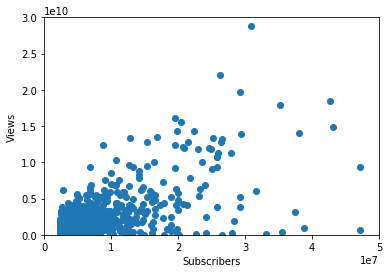

[]


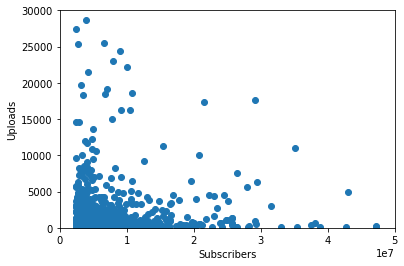

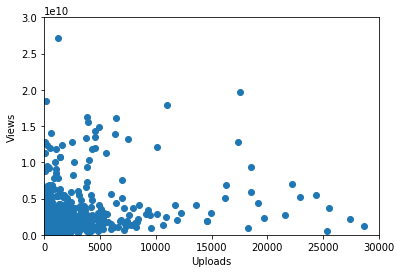

In [418]:
plt.xlim(0, 50000000)
plt.ylim(0, 30000000000)
plt.scatter(data.subs, data.views)
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.show();

from sklearn.cluster import DBSCAN

cluster_data = data[['subs', 'views']]

dbscan = DBSCAN()
dbscan.fit(cluster_data)
print(dbscan.components_)

plt.xlim(0, 50000000)
plt.ylim(0, 30000)
plt.scatter(data.subs, data.uploads)
plt.xlabel('Subscribers')
plt.ylabel('Uploads')
plt.show();

plt.xlim(0, 30000)
plt.ylim(0, 30000000000)
plt.scatter(data.uploads, data.views)
plt.xlabel('Uploads')
plt.ylabel('Views')
plt.show();